### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)


#Load the dataset into a pandas dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
file_name = 'sonar.all-data.csv'
# Put the dataset into a dataframe
Data = pd.read_csv(url, header = None)
# Descriptive statistics of the DataFrame
Data.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010


In [2]:
Data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [3]:
# Substitute R with 0 and M with 1 

Data.loc[(Data[60] == 'R')  ,60] = 0
Data.loc[(Data[60] == 'M') ,60] = 1
X = Data.iloc[: , :59]
y = Data[60].astype(str).astype(int)

In [20]:
#Finding the best parameters on the validation set using gridsearch (min. 2 parameters) for one model

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.85
Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.87

Best estimator:
SVC(C=10, gamma=1)


In [21]:
# converting to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# showing the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004384,0.000805,0.002603,0.000790,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.53125,0.548387,0.548387,0.548387,0.548387,0.54496,0.006855,13
1,0.004388,0.000501,0.002789,0.000961,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.53125,0.548387,0.548387,0.548387,0.548387,0.54496,0.006855,13
2,0.004388,0.000799,0.003198,0.001932,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.53125,0.548387,0.548387,0.548387,0.548387,0.54496,0.006855,13
3,0.004388,0.000784,0.001789,0.000382,0.001,1,"{'C': 0.001, 'gamma': 1}",0.53125,0.548387,0.548387,0.548387,0.548387,0.54496,0.006855,13
4,0.003595,0.000480,0.001991,0.000010,0.001,10,"{'C': 0.001, 'gamma': 10}",0.53125,0.548387,0.548387,0.548387,0.548387,0.54496,0.006855,13


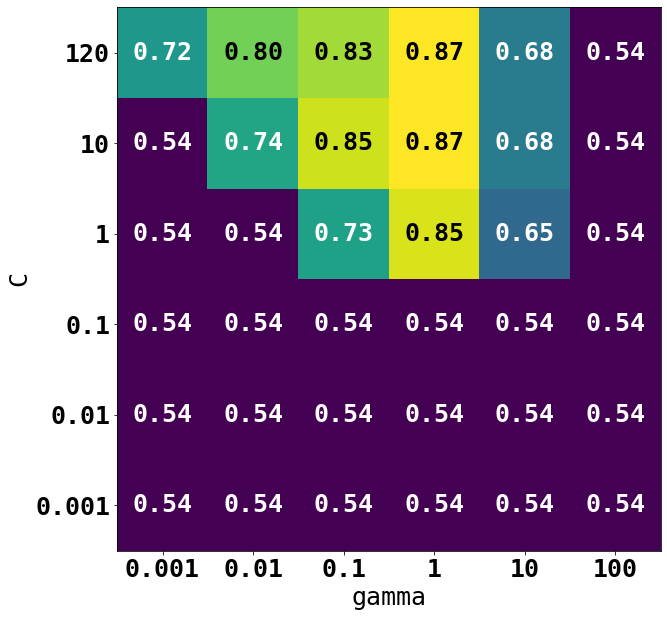

In [22]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# Ploting a heatmap of the parameters to find the best set of parameters
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

svc = SVC(gamma=1,C= 10).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

def plot_pre_rec():
    plt.plot(precision, recall, label="svc")
    plt.plot(precision[close_zero], recall[close_zero], 'o',
             label="threshold zero svc", fillstyle="none", c='k', mew=2)
    
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")

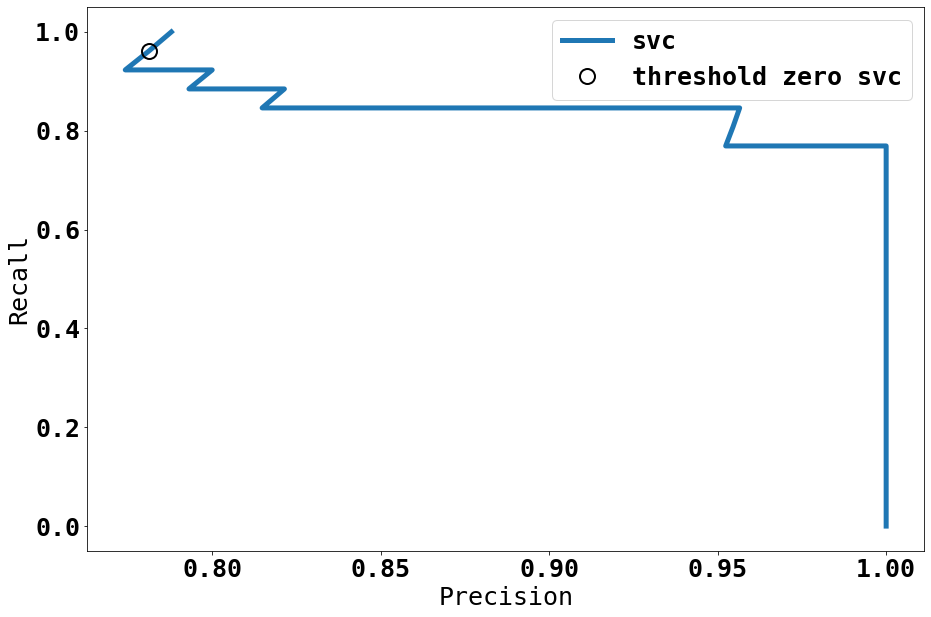

In [24]:
plot_pre_rec()

#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

In [37]:
# Put the dataset into a dataframe
sonar_data =  pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls", sheet_name='Data', usecols='K:AE,AR,AT', header=1, skiprows =[2128,2129,2130])

# dtypes for our columns
sonar_data.dtypes

LB            int64
AC.1        float64
FM.1        float64
UC.1        float64
DL.1        float64
DS.1        float64
DP.1        float64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
CLASS         int64
NSP           int64
dtype: object

In [38]:
sonar_data

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79,0.2,25,...,177,4,0,153,150,152,2,0,5,2
2122,140,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78,0.4,22,...,169,6,0,152,148,151,3,1,5,2
2123,140,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79,0.4,20,...,170,5,0,153,148,152,4,1,5,2
2124,140,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78,0.4,27,...,169,6,0,152,147,151,4,1,5,2


In [39]:
#Find the best two models by creating a complete pipeline with different parameters and algorithms.
#One model should predict the morphologic pattern and the other the fetal state.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
X = sonar_data.iloc[: , :21]
y_nsp = sonar_data["NSP"]
y_class = sonar_data["CLASS"]

X_train, X_test, y_train, y_test = train_test_split(X,y_nsp, random_state=0)


pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.90


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X = sonar_data.iloc[: , :21]
y_nsp = sonar_data["NSP"]
y_class = sonar_data["CLASS"]

X_train, X_test, y_train, y_test = train_test_split(X,y_class, random_state=0)



pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.80


In [46]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [47]:
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]


In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
start = time()
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds"
      " parameter settings." % ((time() - start)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

GridSearchCV took 17.21 seconds parameter settings.
Best params:
{'classifier': RandomForestClassifier(max_features=3), 'classifier__max_features': 3, 'preprocessing': None}

Best cross-validation score: 0.94
Test-set score: 0.94


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y_nsp, random_state=0)


pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.91


In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
start = time()
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds"
      " parameter settings." % ((time() - start)))

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

GridSearchCV took 18.63 seconds parameter settings.
Best params:
{'classifier': RandomForestClassifier(max_features=3), 'classifier__max_features': 3, 'preprocessing': None}

Best cross-validation score: 0.93
Test-set score: 0.94
